In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   SelfEmployed       582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Preprocessing

In [5]:
df = df.dropna()
df.columns = [col.strip() for col in df.columns]

In [6]:
DICT = {1.0 : 'Has Credit History', 0.0: 'Has No Credit History'}
df['Credit_History'] = df['Credit_History'].replace(DICT)
df['Dependents'] = df['Dependents'].replace('3+', 4)
df['Dependents'] = df['Dependents'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    int32  
 4   Education          480 non-null    object 
 5   SelfEmployed       480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    object 
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 50.6+ KB


In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Has Credit History,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Has Credit History,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Has Credit History,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Has Credit History,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Has Credit History,Urban,Y


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Loan_Status'] = encoder.fit_transform(df['Loan_Status'])

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Has Credit History,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Has Credit History,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Has Credit History,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Has Credit History,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Has Credit History,Urban,1


In [11]:
males = df[df['Gender'] == 'Male']['Loan_Status']
male_loans = males.sum()/len(males)
print('''The fraction of men who got loans:''', male_loans)

The fraction of men who got loans: 0.7055837563451777


In [12]:
females = df[df['Gender'] == 'Female']['Loan_Status']
female_loans = females.sum()/len(females)
print('''The fraction of women who got loans:''', female_loans)

The fraction of women who got loans: 0.627906976744186


In [13]:
grads = df[df['Education'] == 'Graduate']['Loan_Status']
grad_loans = grads.sum()/len(grads)
print('''The fraction of graduates who got loans:''', grad_loans)

The fraction of graduates who got loans: 0.7075718015665796


In [14]:
nongrads = df[df['Education'] == 'Not Graduate']['Loan_Status']
nongrad_loans = nongrads.sum()/len(nongrads)
print('''The fraction of non-graduates who got loans:''', nongrad_loans)

The fraction of non-graduates who got loans: 0.6288659793814433


In [15]:
cred_hist = df[df['Credit_History'] == 'Has Credit History']['Loan_Status']
cred_hist_loans = cred_hist.sum()/len(cred_hist)
print('''The fraction of applicants with credit history who got loans:''', cred_hist_loans)

The fraction of applicants with credit history who got loans: 0.7926829268292683


In [16]:
nocred_hist = df[df['Credit_History'] == 'Has No Credit History']['Loan_Status']
nocred_hist_loans = nocred_hist.sum()/len(nocred_hist)
print('''The fraction of applicants with no credit history who got loans:''', nocred_hist_loans)

The fraction of applicants with no credit history who got loans: 0.1


# Data Visualisation

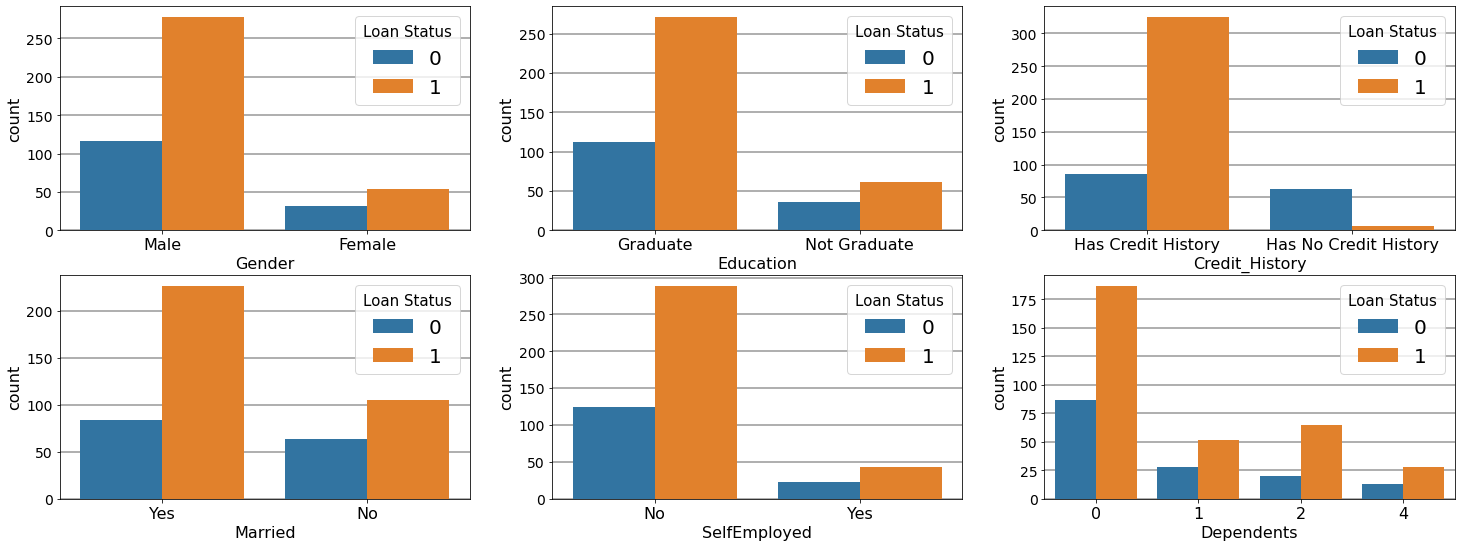

In [17]:
plt.figure(figsize=(25, 14))
plt.subplot(3,3,1)
plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.grid(linewidth=2, zorder=0)
ax = sns.countplot(data = df, x=df['Gender'], hue = df['Loan_Status'])
ax.set_axisbelow(True)
legend = ax.legend(fontsize = 20)
legend.set_title('Loan Status', prop={'size': 15})
plt.subplot(3,3,2)
plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.grid(linestyle = '-', linewidth=2, zorder=0)
ax = sns.countplot(data = df, x=df['Education'], hue = df['Loan_Status'])
ax.set_axisbelow(True)
legend = ax.legend(fontsize = 20)
legend.set_title('Loan Status', prop={'size': 15})
plt.subplot(3,3,3)
plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.grid(linestyle = '-', linewidth=2, zorder=0)
ax = sns.countplot(data = df, x=df['Credit_History'], hue = df['Loan_Status'])
ax.set_axisbelow(True)
legend = ax.legend(fontsize = 20)
legend.set_title('Loan Status', prop={'size': 15})
plt.subplot(3,3,4)
plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.grid(linestyle = '-', linewidth=2, zorder=0)
ax = sns.countplot(data = df, x=df['Married'], hue = df['Loan_Status'])
ax.set_axisbelow(True)
legend = ax.legend(fontsize = 20)
legend.set_title('Loan Status', prop={'size': 15})
plt.subplot(3,3,5)
plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.grid(linestyle = '-', linewidth=2, zorder=0)
ax = sns.countplot(data = df, x=df['SelfEmployed'], hue = df['Loan_Status'])
ax.set_axisbelow(True)
legend = ax.legend(fontsize = 20)
legend.set_title('Loan Status', prop={'size': 15})
plt.subplot(3,3,6)
plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.grid(linestyle = '-', linewidth=2, zorder=0)
ax = sns.countplot(data = df, x=df['Dependents'], hue = df['Loan_Status'])
ax.set_axisbelow(True)
legend = ax.legend(fontsize = 20)
legend.set_title('Loan Status', prop={'size': 15})
plt.show()

# Random Forest Classifier

## Splitting the Dataset

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
columns_to_encode = ['Gender', 'Married', 'Education', 'SelfEmployed', 'Property_Area', 'Credit_History']
df = pd.get_dummies(df, columns = columns_to_encode)

In [19]:
X = df.drop(columns = ['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

## Training the Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier(n_estimators = 25, random_state = 21)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=21)

## Making Predictions

In [23]:
y_pred = model.predict(X_test)

## Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
accuracy = accuracy_score(y_test, y_pred)

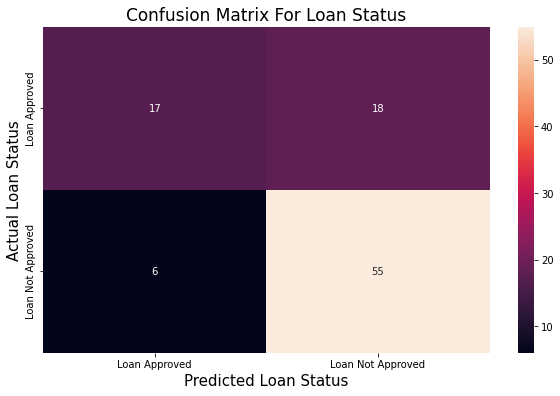

In [26]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Loan Approved', 'Loan Not Approved']
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix For Loan Status', fontsize=17)
plt.xlabel('Predicted Loan Status', fontsize=15)
plt.ylabel('Actual Loan Status', fontsize=15)
plt.show()

In [27]:
accuracy

0.75

The next thing to consider is can we tune the hyperparameters in our model to improve the performance/accuracy of the model.

# Hyperparameter Tuning

## GridSearch & Cross Validation

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [29]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gbm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [500, 1000, 10000]
}
# Create dictionary of models and their respective parameter grids
models = {
    'RandomForest': (RandomForestClassifier(), param_grid_rf),
    'DecisionTree': (DecisionTreeClassifier(), param_grid_dt),
    'GradientBoosting': (GradientBoostingClassifier(), param_grid_gbm),
    'XGBoost': (XGBClassifier(), param_grid_xgb),
    'LogisticRegression': (LogisticRegression(), param_grid_lr)
    
}

# Perform grid search for each model

for model_name, (model, param_grid) in models.items():
    print(f"Grid search for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best hyperparameters for {model_name}: {best_params}")
    
    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the best {model_name} model on test set: {accuracy:.4f}\n")

Grid search for RandomForest...
Best hyperparameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of the best RandomForest model on test set: 0.7917

Grid search for DecisionTree...
Best hyperparameters for DecisionTree: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy of the best DecisionTree model on test set: 0.7708

Grid search for GradientBoosting...
Best hyperparameters for GradientBoosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Accuracy of the best GradientBoosting model on test set: 0.7708

Grid search for XGBoost...
Best hyperparameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Accuracy of the best XGBoost model on test set: 0.7708

Grid search for LogisticRegression...
Best hyperparameters for LogisticRegression: {'C': 1, 'max_iter': 500, 'solver': 'lbfgs'}
Accuracy of the best LogisticRegression model on test set: 0.7604



So it turns out we have improved the model slighly using GridSearch and Cross Validation.